# I. CÂU HỎI


## Nội dung

**Quy mô của các công ty thuộc mảng Tech thay đổi như thế nào qua các năm? Đâu các là nước đã dẫn đầu hiện nay?**
## Mục đích


- Tìm hiểu về xu hướng tăng giảm về quy mô

- Tìm hiểu liệu rằng đây có phải là danh mục đang được thế giới quan tâm hay không?

- Tìm hiểu về xu hướng phát triển trên thế giới

- Tìm hiểu về tốc độ phát triển của lĩnh vực công nghệ
___


# II. Tiền xử lý

## Import các thư viện cần thiết

In [339]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Load file `.csv` đã được qua xử lý

In [340]:
df = pd.read_csv("../Data/preprocessed/cleaned_dataset.csv")
df.head()

,Company,Year,EPS ($),Earnings ($B),Revenue ($B),Marketcap ($B),Total Debts ($B),Net Assets ($B),Total Assets ($B),Cash on hand ($B),Country,Share price ($),Categories
0,Apple,2023,6.16,114.30,383.28,3043.0,111.08,62.14,352.58,61.55,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
1,Apple,2022,5.92,113.96,387.53,2066.0,120.06,50.67,352.75,48.30,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
2,Apple,2021,6.08,116.90,378.32,2901.0,124.71,63.09,351.00,62.63,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
3,Apple,2020,3.74,74.25,294.13,2255.0,112.43,65.33,323.88,90.94,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
4,Apple,2019,3.19,66.15,267.68,1287.0,108.04,90.48,338.51,100.55,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."


Xem `data type` và số lượng `missing-value` của các cột

In [341]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41446 entries, 0 to 41445
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company            41446 non-null  object 
 1   Year               41446 non-null  int64  
 2   EPS ($)            41446 non-null  float64
 3   Earnings ($B)      41446 non-null  float64
 4   Revenue ($B)       41446 non-null  float64
 5   Marketcap ($B)     41446 non-null  float64
 6   Total Debts ($B)   41446 non-null  float64
 7   Net Assets ($B)    41446 non-null  float64
 8   Total Assets ($B)  41446 non-null  float64
 9   Cash on hand ($B)  41446 non-null  float64
 10  Country            41446 non-null  object 
 11  Share price ($)    41446 non-null  float64
 12  Categories         41446 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 4.1+ MB


**Nhận xét**
- Kiểu dữ liệu của các cột đã phù hợp

- Không tồn tại missing-value trong các cột

____

# III. Phân tích & trả lời

Lọc ra các công ty trong danh mục `Tech`

In [342]:

tech_cat_mark = df["Categories"].str.contains("Tech")
tech_df = df[tech_cat_mark].copy()
tech_df.head()

,Company,Year,EPS ($),Earnings ($B),Revenue ($B),Marketcap ($B),Total Debts ($B),Net Assets ($B),Total Assets ($B),Cash on hand ($B),Country,Share price ($),Categories
0,Apple,2023,6.16,114.30,383.28,3043.0,111.08,62.14,352.58,61.55,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
1,Apple,2022,5.92,113.96,387.53,2066.0,120.06,50.67,352.75,48.30,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
2,Apple,2021,6.08,116.90,378.32,2901.0,124.71,63.09,351.00,62.63,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
3,Apple,2020,3.74,74.25,294.13,2255.0,112.43,65.33,323.88,90.94,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."
4,Apple,2019,3.19,66.15,267.68,1287.0,108.04,90.48,338.51,100.55,USA,195.71,"Software, Tech, Electronics, Dow jones, Tech H..."


Để đánh giá quy mô của một công ty hay một danh mục cụ thể, ta sẽ dùng chỉ số `Marketcap`.

Ta quan tâm đến giá trị `Marketcap ($B)` để xem quy mô trong mảng `Tech` của các nước theo các năm nên ta chỉ giữ lại:

- `Year`

- `Company`

- `Marketcap ($B)`

- `Country`

In [343]:
tech_df = tech_df[["Company", "Year", "Marketcap ($B)", "Country"]]
tech_df.head()

,Company,Year,Marketcap ($B),Country
0,Apple,2023,3043.0,USA
1,Apple,2022,2066.0,USA
2,Apple,2021,2901.0,USA
3,Apple,2020,2255.0,USA
4,Apple,2019,1287.0,USA


### Sự thay đổi về tổng giá trị vốn hoá trong danh mục `Tech` qua các năm

Tạo DataFrame thể hiện tổng giá trị vốn hoá theo từng năm

In [344]:
total_marketcap_tech_df = tech_df.groupby("Year")["Marketcap ($B)"].sum().to_frame().reset_index()
total_marketcap_tech_df.rename(columns={'Marketcap ($B)': 'Tech Total Marketcap'}, inplace=True)
total_marketcap_tech_df.head()

,Year,Tech Total Marketcap
0,2001,6523.88088
1,2002,5908.50065
2,2003,6416.59217
3,2004,6389.17181
4,2005,6353.40965


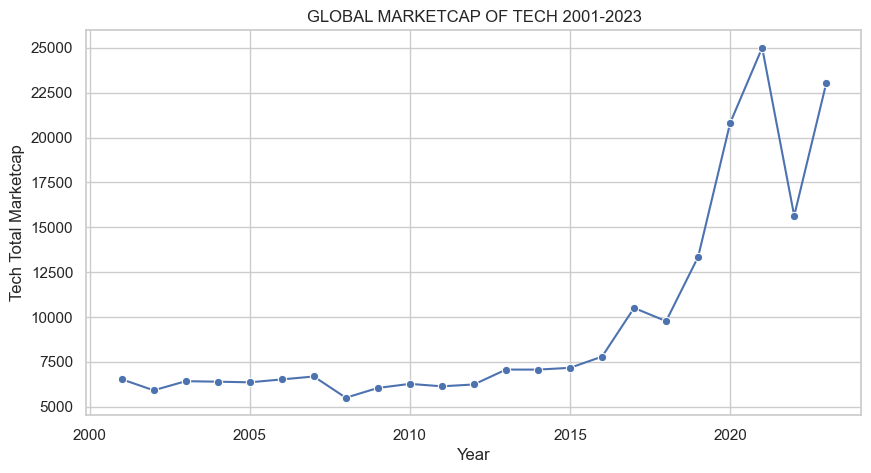

In [345]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=total_marketcap_tech_df, x="Year", y="Tech Total Marketcap", marker='o')
sns.set(style="whitegrid")
plt.title("GLOBAL MARKETCAP OF TECH 2001-2023");

**Nhận xét**

- Tổng vốn hoá của thị trường danh mục `Tech` có xu hướng tăng dần qua các năm

- Phát triển nhanh từ sau năm 2015

- Đỉnh điểm là vào năm 2021, sau đó sụt giảm mạnh vào năm 2022 (nguyên nhân một phần đến từ dịch bệnh)

- Năm 2023, tổng vốn hoá của thị trường đang có xu hướng tăng mạnh trở lại

### Sự thay đổi về tỉ lệ vốn hoá của `Tech` so với tổng thể

Tạo DataFrame chứa tổng giá trị vốn hoá của tất cả mọi danh mục

In [346]:
total_marketcap_df = df.groupby('Year')['Marketcap ($B)'].sum().to_frame().reset_index()
total_marketcap_df.rename(columns={'Marketcap ($B)': 'Total Marketcap'}, inplace=True)
total_marketcap_df.head()

,Year,Total Marketcap
0,2001,36297.651915
1,2002,33315.812255
2,2003,34727.095955
3,2004,36343.161625
4,2005,37267.685355


Merge với tổng vốn hoá theo `Tech`

In [347]:
total_marketcap_df = total_marketcap_df.merge(total_marketcap_tech_df, how='inner', on='Year')
total_marketcap_df.head()

,Year,Total Marketcap,Tech Total Marketcap
0,2001,36297.651915,6523.88088
1,2002,33315.812255,5908.50065
2,2003,34727.095955,6416.59217
3,2004,36343.161625,6389.17181
4,2005,37267.685355,6353.40965


Tạo cột tỉ lệ giữa tổng vốn hoá của `Tech` so với tổng thể (%)

In [348]:
total_marketcap_df['Tech Marketcap Ratio'] = total_marketcap_df['Tech Total Marketcap'] / total_marketcap_df['Total Marketcap'] * 100
total_marketcap_df.head()

,Year,Total Marketcap,Tech Total Marketcap,Tech Marketcap Ratio
0,2001,36297.651915,6523.88088,17.973286
1,2002,33315.812255,5908.50065,17.734824
2,2003,34727.095955,6416.59217,18.477192
3,2004,36343.161625,6389.17181,17.580121
4,2005,37267.685355,6353.40965,17.048039


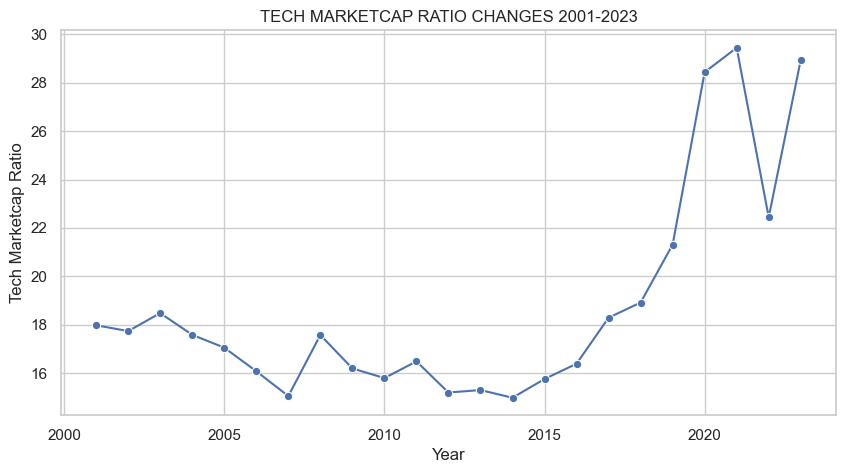

In [349]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=total_marketcap_df, x='Year', y='Tech Marketcap Ratio', marker='o')
plt.title('TECH MARKETCAP RATIO CHANGES 2001-2023');

**Nhận xét**

- Tỉ lệ tổng vốn hoá của danh mục Tech so với tổng thể có nhiều biến động tăng giảm trong giai đoạn 2001-2014

- Từ 2014-2021, tăng rất nhanh và liên tục. Chạm đỉnh vào năm 2021

- Năm 2022 sụt giảm đáng kể

- Năm 2023 đã tăng nhanh trở lại. Đây có thể là dấu hiệu phục hồi sau khi vượt qua dịch bệnh

### Các quốc gia dẫn đầu trong mảng Tech hiện nay

Khi đã có cái nhìn sơ lược về sự phát triển trên toàn cầu. Bây giờ chúng ta sẽ tìm ra đâu là các quốc gia đã dẫn đầu trong lĩnh vực này

Tạo DataFrame mới chứa tổng vốn hoá theo quốc gia

In [350]:
tech_country_df = tech_df[tech_df["Year"] == 2023].groupby("Country")["Marketcap ($B)"].sum().to_frame().reset_index()
tech_country_df.sort_values(by="Marketcap ($B)", inplace=True, ascending=False)
tech_country_df.head()

,Country,Marketcap ($B)
25,USA,18360.77
2,China,1151.67
22,Taiwan,762.51
18,South Korea,525.36
11,Japan,494.20


Text(0.5, 1.0, 'Total marketcap in Tech by Country 2023')

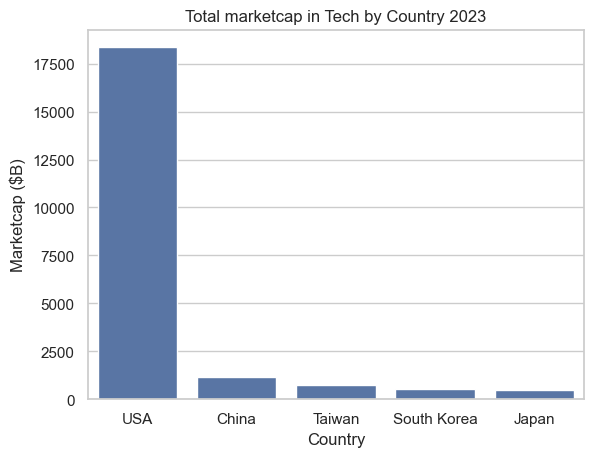

In [351]:

sns.barplot(data=tech_country_df.head(), x="Country", y="Marketcap ($B)")
plt.title("Total marketcap in Tech by Country 2023")

**Nhận xét**

- Hiện nay, `USA` là nước dẫn đầu và vượt rất xa so với phần còn lại, tổng giá trị vốn hoá gấp nhiều lần các nước khác.

- Tiếp đến là `China`.

- `Taiwan`, `South Korea` và `Japan` có sự chênh lệch không đáng kể

___
### Kết luận

- Danh mục `Tech` là xu hướng phát triển của thế giới hiện nay và đang có xu hướng gia tăng về quy mô.

- Tốc độ phát triển rất nhanh.

- Đang dần có xu hướng trở thành ngành có quy mô lớn nhất trên thế giới.